In [35]:
import sys

# Replace this with the path to the repository
sys.path.append("/home/zhenhao/ETFMH/")

In [36]:
from db_sketching.genome_selection import GenomeFiltering
from db_sketching.kmer_set import KMerSet, FracMinHash


def cond(kmer_hash):
    hash = (976369 * kmer_hash + 1982627) % 10000
    if hash < 100:
        return True
    else:
        return False

kmer_set = FracMinHash(cond, 12, True)
gf = GenomeFiltering(kmer_set)

In [37]:
from glob import glob

for f in glob("../Staphylococcaceae_data/*/*.fna"):
    gf.insert_genome(f)
    print(f)

../Staphylococcaceae_data/Mammaliicoccus/GCA_017971705.1.fna
../Staphylococcaceae_data/Mammaliicoccus/GCA_014635645.1.fna
../Staphylococcaceae_data/Mammaliicoccus/GCA_018502265.1.fna
../Staphylococcaceae_data/Mammaliicoccus/GCA_016891065.1.fna
../Staphylococcaceae_data/Mammaliicoccus/GCA_021215395.1.fna
../Staphylococcaceae_data/Mammaliicoccus/GCA_022386115.1.fna
../Staphylococcaceae_data/Mammaliicoccus/GCA_016890885.1.fna
../Staphylococcaceae_data/Mammaliicoccus/GCA_015235615.1.fna
../Staphylococcaceae_data/Mammaliicoccus/GCA_001766785.2.fna
../Staphylococcaceae_data/Mammaliicoccus/GCA_022810235.1.fna
../Staphylococcaceae_data/Mammaliicoccus/GCA_003043315.1.fna
../Staphylococcaceae_data/Mammaliicoccus/GCA_016808275.1.fna
../Staphylococcaceae_data/Mammaliicoccus/GCA_016893425.1.fna
../Staphylococcaceae_data/Mammaliicoccus/GCA_015234835.1.fna
../Staphylococcaceae_data/Mammaliicoccus/GCA_022386655.1.fna
../Staphylococcaceae_data/Mammaliicoccus/GCA_022809985.1.fna
../Staphylococcaceae_dat

In [38]:
import numpy as np

genome_list = list(gf.genome_dict.keys())
distance_matrix = np.zeros((len(genome_list), len(genome_list)))
for i in range(len(genome_list)):
    for j in range(i+1, len(genome_list)):
        distance = gf.genome_dict[genome_list[i]].resemblence(gf.genome_dict[genome_list[j]])
        distance_matrix[i][j] = distance_matrix[j][i] = 1 - distance

<Axes: >

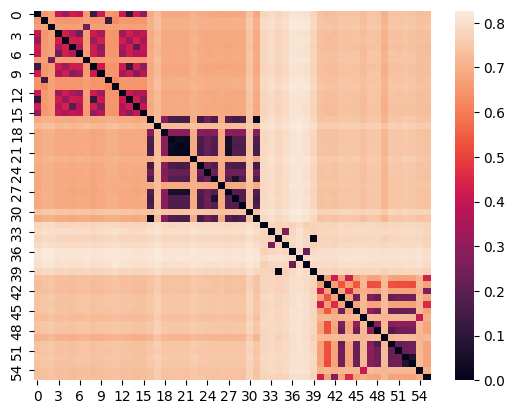

In [39]:
import seaborn

seaborn.heatmap(distance_matrix)

In [41]:
len(gf.hierarchical_clustering(genome_list, distance_matrix, 0.3))

26

In [42]:
hc = gf.hierarchical_clustering(genome_list, distance_matrix, 0.2)
hc

[[2],
 [3],
 [4],
 [6],
 [7],
 [9],
 [1, 10],
 [11],
 [12],
 [0, 8, 13],
 [5, 14],
 [15],
 [17],
 [18],
 [22],
 [24],
 [26],
 [30],
 [16, 19, 20, 21, 23, 25, 27, 28, 29, 31],
 [32],
 [33],
 [35],
 [36],
 [37],
 [38],
 [34, 39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [49],
 [48, 50],
 [51],
 [52, 53],
 [54],
 [55]]

In [43]:
# Naive way of selecting signature
from collections import Counter

naive_counter = Counter()

for f in genome_list:
    naive_counter.update(list(gf.genome_dict[f].set))


In [44]:
len(naive_counter)

68660

<Axes: ylabel='Count'>

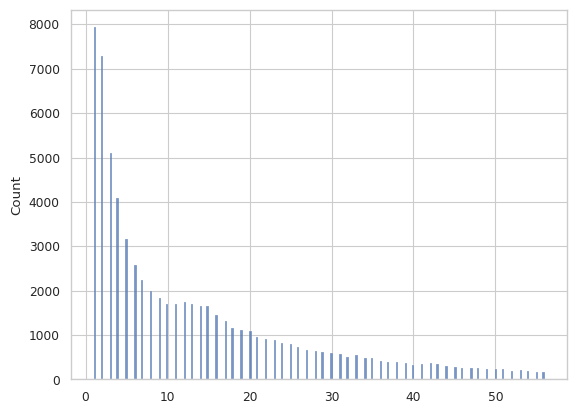

In [76]:
import seaborn

seaborn.histplot([i for i in list(naive_counter.values()) if i >= 0], bins=200)

In [46]:
# After hierarchical clustering
import random
hc_counter = Counter()

for j in hc:
    sampled_genome = random.sample(j, 1)
    print(sampled_genome)
    hc_counter.update(list(gf.genome_dict[genome_list[sampled_genome[0]]].set))

[2]
[3]
[4]
[6]
[7]
[9]
[1]
[11]
[12]
[13]
[5]
[15]
[17]
[18]
[22]
[24]
[26]
[30]
[28]
[32]
[33]
[35]
[36]
[37]
[38]
[34]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[49]
[50]
[51]
[53]
[54]
[55]


<Axes: ylabel='Count'>

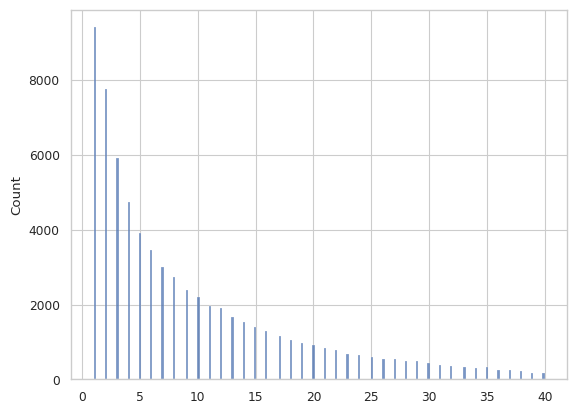

In [75]:
seaborn.histplot([i for i in list(hc_counter.values()) if i >= 0], bins=200)

In [66]:
hc_signature = set([i for i,j in hc_counter.most_common(10000)])

In [67]:
naive_signature = set([i for i, _ in naive_counter.most_common(10000)])

In [59]:
len(hc_signature.intersection(naive_signature))

17765

In [52]:
gf_other = GenomeFiltering(kmer_set)

for f in glob("../Other_data/*/*.fna"):
    gf_other.insert_genome(f)
    print(f)

../Other_data/Kingella_B/GCA_905373195.1.fna
../Other_data/Kingella_B/GCA_915062845.1.fna
../Other_data/Kingella_B/GCA_014054985.1.fna
../Other_data/Kingella_B/GCA_000160435.1.fna
../Other_data/Kingella_B/GCA_016623605.1.fna
../Other_data/JAKJGF01/GCA_022704525.1.fna
../Other_data/Gloeocapsopsis/GCA_002964865.1.fna
../Other_data/Gloeocapsopsis/GCA_015207655.1.fna
../Other_data/Gloeocapsopsis/GCA_009728615.1.fna
../Other_data/Gloeocapsopsis/GCA_002749975.1.fna
../Other_data/SIG714/GCA_015063395.1.fna
../Other_data/RGIG2431/GCA_017434185.1.fna
../Other_data/GCA-2687025/GCA_018665855.1.fna
../Other_data/GCA-2687025/GCA_018667155.1.fna
../Other_data/GCA-2687025/GCA_018644665.1.fna
../Other_data/GCA-2687025/GCA_002687025.1.fna
../Other_data/GCA-2687025/GCA_018693355.1.fna
../Other_data/GCA-2687025/GCA_018676215.1.fna
../Other_data/UBA10174/GCA_001805405.1.fna
../Other_data/UBA10174/GCA_003528115.1.fna
../Other_data/UBA10174/GCA_001804395.1.fna
../Other_data/DTVJ01/GCA_012963565.1.fna
../Oth

In [53]:
gf_test = GenomeFiltering(kmer_set)

for f in glob("../Staphylococcaceae_data_test/*.fna"):
    gf_test.insert_genome(f)
    print(f)

../Staphylococcaceae_data_test/GCA_004359575.1.fna
../Staphylococcaceae_data_test/GCA_024205905.1.fna
../Staphylococcaceae_data_test/GCA_012277565.1.fna
../Staphylococcaceae_data_test/GCA_016890305.1.fna
../Staphylococcaceae_data_test/GCA_019294655.1.fna
../Staphylococcaceae_data_test/GCA_000638515.1.fna
../Staphylococcaceae_data_test/GCA_001046995.1.fna
../Staphylococcaceae_data_test/GCA_003720415.1.fna
../Staphylococcaceae_data_test/GCA_011065325.1.fna
../Staphylococcaceae_data_test/GCA_003259685.1.fna
../Staphylococcaceae_data_test/GCA_022343705.1.fna
../Staphylococcaceae_data_test/GCA_022386275.1.fna
../Staphylococcaceae_data_test/GCA_022385855.1.fna
../Staphylococcaceae_data_test/GCA_002834705.1.fna
../Staphylococcaceae_data_test/GCA_004359515.1.fna
../Staphylococcaceae_data_test/GCA_002414265.1.fna


In [68]:
train_containment_hc = []
test_containment_hc = []
other_containment_hc = []
train_containment_naive = []
test_containment_naive = []
other_containment_naive = []

for genome in gf.genome_dict:
    train_containment_hc.append(len(hc_signature.intersection(gf.genome_dict[genome].set)))
    train_containment_naive.append(len(naive_signature.intersection(gf.genome_dict[genome].set)))

for genome in gf_other.genome_dict:
    other_containment_hc.append(len(hc_signature.intersection(gf_other.genome_dict[genome].set)))
    other_containment_naive.append(len(naive_signature.intersection(gf_other.genome_dict[genome].set)))

for genome in gf_test.genome_dict:
    test_containment_hc.append(len(hc_signature.intersection(gf_test.genome_dict[genome].set)))
    test_containment_naive.append(len(naive_signature.intersection(gf_test.genome_dict[genome].set)))

<Axes: >

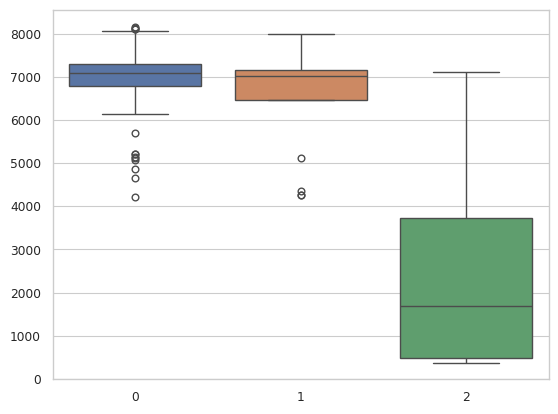

In [73]:
seaborn.set(style='whitegrid')
seaborn.set_context("paper")
seaborn.boxplot((train_containment_hc, test_containment_hc, other_containment_hc))#["Escherichia", "Other"])

<Axes: >

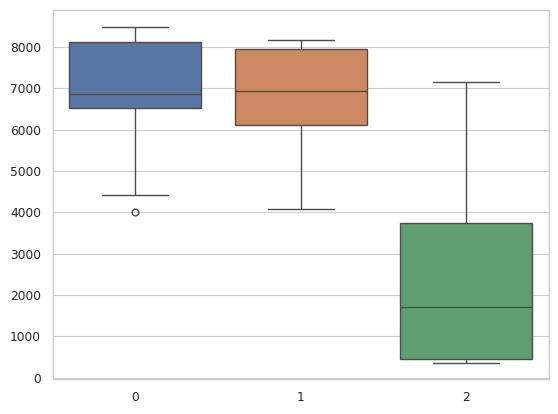

In [80]:
seaborn.boxplot((train_containment_naive, test_containment_naive, other_containment_naive))

<Axes: >

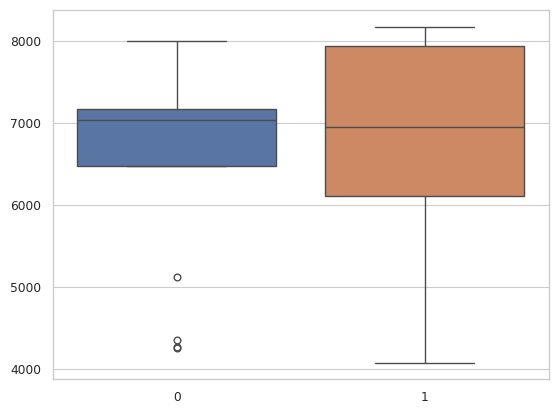

In [78]:
seaborn.boxplot((test_containment_hc, test_containment_naive))

<Axes: >

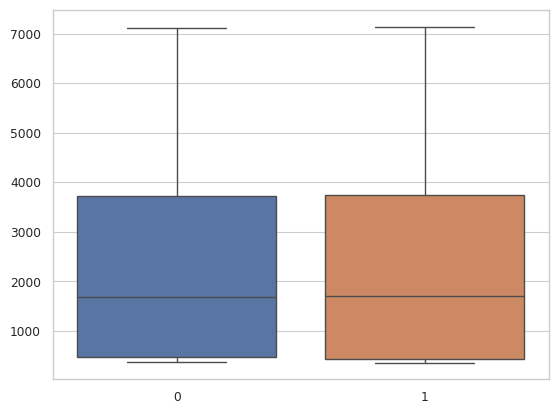

In [81]:
seaborn.boxplot((other_containment_hc, other_containment_naive))